# kaggle项目：泰坦尼克号获救预测

In [1]:
import pandas as pd
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据描述性统计

In [2]:
data = titanic
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从描述性统计中可以看到，age字段存在数据缺失；  
sibsp代表兄弟姐妹的数目  
parch代表parent and child老人和孩子的数目  
ticket票的编号  
cabin住在哪个仓，缺失值较多  
embarked从哪个站点上船  
下面将通过数据分析考察部分字段对是否获救的影响。

### 数据预处理

In [3]:
# 缺失值处理
# 1. 使用年龄均值填充年龄字段缺失值
data['Age'] = data['Age'].fillna(data['Age'].median())
# 2. 使用频数最高的值填充embarked字段
# print(pd.value_counts(data.Embarked))
data['Embarked'] = data['Embarked'].fillna('S')

In [4]:
# 将Sex字段用0-1值表示
# print(data['Sex'].unique())
data.loc[data['Sex'] == 'male','Sex'] = 0
data.loc[data['Sex'] == 'female','Sex'] = 1

In [5]:
# 将Embarked字段用离散值0,1,2表示
# print(data['Embarked'].unique())
data.loc[data['Embarked'] == 'S','Embarked'] = 0
data.loc[data['Embarked'] == 'C','Embarked'] = 1
data.loc[data['Embarked'] == 'Q','Embarked'] = 2

In [6]:
# 查看处理后的结果
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### 建立分类器，预测是否被获救

In [26]:
# 选取一部分特征用于预测
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 使用逻辑斯蒂回归模型
lr = LogisticRegression(random_state=1)
scores = cross_val_score(lr, data[predictors], data["Survived"], cv=10)
print(scores.mean())

0.7935410282601294


In [28]:
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林模型
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
scores = cross_val_score(rf, data[predictors], data["Survived"], cv=10)
print(scores.mean())

0.8092841334695267


In [32]:
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林模型
rf = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, min_samples_leaf=1)
scores = cross_val_score(rf, data[predictors], data["Survived"], cv=10)
print(scores.mean())

0.8138043354897289


In [35]:
import pandas as pd
import re
# 使用原有特征准确率不高，构造新的特征进行试验
data["FamilySize"] = data["SibSp"] + data["Parch"]
data["NameLength"] = data["Name"].apply(lambda x: len(x))

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titles = data["Name"].apply(get_title)
# print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

print(pd.value_counts(titles))
data["Title"] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


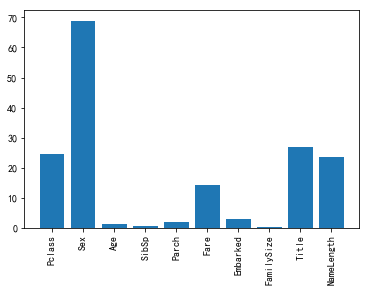

In [41]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
# 特征选择，查看每个特征对最终结果有多大影响，去除影响小的特征

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
selector = SelectKBest(f_classif, k=5)
selector.fit(data[predictors], data["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [42]:
# 使用选择后的特征进行建模预测
predictors = ["Pclass", "Sex", "Fare", "Title"]
rf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
scores = cross_val_score(rf2, data[predictors], data["Survived"], cv=10)
print(scores.mean())
# 准确率提高了！

0.8384105095902848


In [44]:
predictors = ["Pclass", "Sex", "Fare", "Title"]
lr2 = LogisticRegression(random_state=1)
scores = cross_val_score(lr2, data[predictors], data["Survived"], cv=10)
print(scores.mean())

0.7844884235614573


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 神经网络模型
# 数据标准化
predictors = ["Pclass", "Sex", "Fare", "Title"]
scaler = StandardScaler()
datascaler = scaler.fit_transform(data[predictors])

mlpc = MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 5),solver='lbfgs', random_state=1)
mlpc.fit(datascaler, data['Survived'])

# mlpc.coefs_
mlpc.score(datascaler, data['Survived'])

0.8215488215488216

In [50]:
mlpc.predict_proba(datascaler)[:5]

array([[0.88592204, 0.11407796],
       [0.02565201, 0.97434799],
       [0.3944794 , 0.6055206 ],
       [0.02596426, 0.97403574],
       [0.88590342, 0.11409658]])

In [53]:
scores = cross_val_score(mlpc, datascaler, data["Survived"], cv=10)
print(scores.mean())

0.8148272046305755
